In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

sns.set_theme()

Simulating the analytical solution for IB problem in the case of 2D-Gaussian

In [3]:
#Defining the dimensions of the vectors
n_x = 2
n_y = 1

#Generating the marginal and parts of the covariance matrix
cov_noise = 0.003*make_spd_matrix(1, random_state=2)
sig_xy = make_spd_matrix(n_x+n_y, random_state=1)
sig_11 = sig_xy[0:2, 0:2].reshape(2,2)
sig_12 = sig_xy[0:2, 2].reshape(2,1)
sig_21 = sig_xy[2, 0:2].reshape(1,2)
sig_22 = sig_xy[2, 2].reshape(1,1)
sig_x = sig_11
#Getting the conditional covariance matrix
cov_x_y = sig_11 - np.matmul(np.matmul(sig_12,(np.linalg.inv(sig_22))), sig_21)
eig_vals, eig_vecs = np.linalg.eig(np.matmul(cov_x_y, np.linalg.inv(sig_x)))
print("Eigen Values:", eig_vals)

Eigen Values: [0.53846209 1.        ]


In [4]:
#Lagrangian
A = np.zeros([2,1]).reshape(1,2)
xx_mesh = np.linspace(-10, 10, 500).reshape(-1,1)
yy_mesh = np.linspace(-10, 10, 500).reshape(-1,1)
# l_t1 = (1-beta_val)*(np.log(np.linalg.det(np.matmul(np.matmul(A, sig_x), A.T))+cov_noise))
# l_t2 = np.log(np.linalg.det(cov_noise))
# l_t3 = beta_val*np.log(np.linalg.det(np.matmul(np.matmul(A, cov_x_y), A.T)+cov_noise))
# lagrangian_val =  l_t1 - l_t2 + l_t3
# lagrangian_val
[X, Y] = np.meshgrid(xx_mesh, yy_mesh)

In [5]:
#Fixing a beta
beta_val = 25 #beta-value greater than the critical value
lagrangian_val_array = np.zeros((len(xx_mesh), len(yy_mesh)))
for i in range(len(xx_mesh)):
  A[:,0] = xx_mesh[i]
  #A[:,1] = xx_mesh[i]
  for j in range(len(yy_mesh)):
    A[:, 1] = yy_mesh[j]
  # for j in range(len(yy_mesh)):
  #   A[:,1] = yy_mesh[j]
    l_t1 = (1-beta_val)*(np.log(np.linalg.det(np.matmul(np.matmul(A, sig_x), A.T))+cov_noise))
    l_t2 = np.log(np.linalg.det(cov_noise))
    l_t3 = beta_val*np.log(np.linalg.det(np.matmul(np.matmul(A, cov_x_y), A.T)+cov_noise))
    lagrangian_val =  l_t1 - l_t2 + l_t3
    lagrangian_val_array[i][j] = lagrangian_val.item()

print("Lagrangian shape:", lagrangian_val_array.shape)

Lagrangian shape: (500, 500)


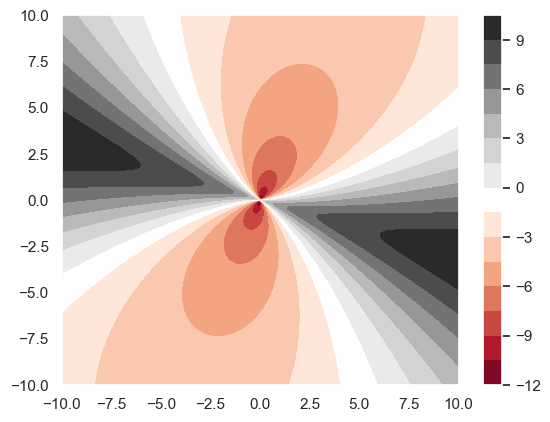

In [6]:
plt.contourf(X, Y, lagrangian_val_array, 20, cmap='RdGy')
plt.colorbar()
plt.savefig("beta25_greater.png")
plt.show()

In [7]:
beta_val = 10 #beta-value greater than the critical value
lagrangian_val_array = np.zeros((len(xx_mesh), len(yy_mesh)))
for i in range(len(xx_mesh)):
  A[:,0] = xx_mesh[i]
  #A[:,1] = xx_mesh[i]
  for j in range(len(yy_mesh)):
    A[:, 1] = yy_mesh[j]
  # for j in range(len(yy_mesh)):
  #   A[:,1] = yy_mesh[j]
    l_t1 = (1-beta_val)*(np.log(np.linalg.det(np.matmul(np.matmul(A, sig_x), A.T))+cov_noise))
    l_t2 = np.log(np.linalg.det(cov_noise))
    l_t3 = beta_val*np.log(np.linalg.det(np.matmul(np.matmul(A, cov_x_y), A.T)+cov_noise))
    lagrangian_val =  l_t1 - l_t2 + l_t3
    lagrangian_val_array[i][j] = lagrangian_val.item()

print("Lagrangian shape:", lagrangian_val_array.shape)

Lagrangian shape: (500, 500)


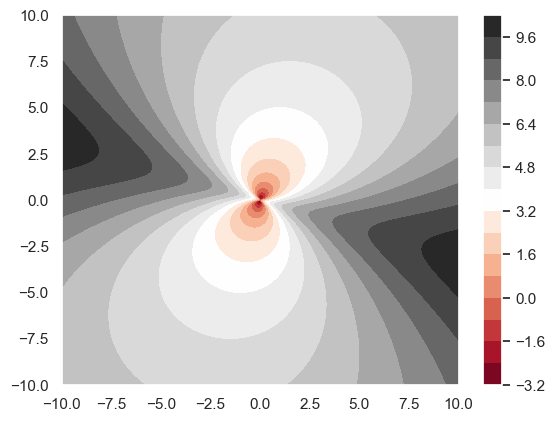

In [8]:
plt.contourf(X, Y, lagrangian_val_array, 20, cmap='RdGy')
plt.colorbar()
plt.savefig("beta10_greater.png")
plt.show()

In [9]:
beta_val = 0.1 #beta-value less than the critical value
lagrangian_val_array = np.zeros((len(xx_mesh), len(yy_mesh)))
for i in range(len(xx_mesh)):
  A[:,0] = xx_mesh[i]
  #A[:,1] = xx_mesh[i]
  for j in range(len(yy_mesh)):
    A[:, 1] = yy_mesh[j]
  # for j in range(len(yy_mesh)):
  #   A[:,1] = yy_mesh[j]
    l_t1 = (1-beta_val)*(np.log(np.linalg.det(np.matmul(np.matmul(A, sig_x), A.T))+cov_noise))
    l_t2 = np.log(np.linalg.det(cov_noise))
    l_t3 = beta_val*np.log(np.linalg.det(np.matmul(np.matmul(A, cov_x_y), A.T)+cov_noise))
    lagrangian_val =  l_t1 - l_t2 + l_t3
    lagrangian_val_array[i][j] = lagrangian_val.item()

print("Lagrangian shape:", lagrangian_val_array.shape)

Lagrangian shape: (500, 500)


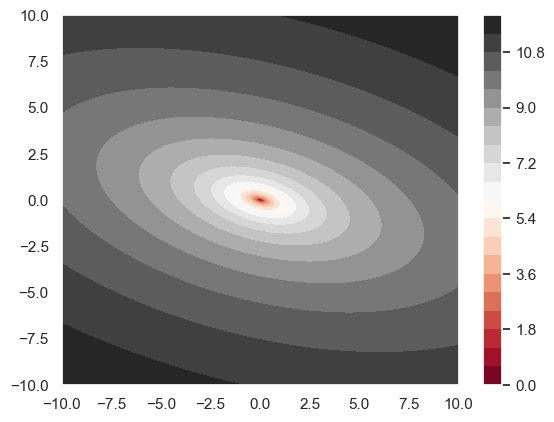

In [10]:
plt.contourf(X, Y, lagrangian_val_array, 20, cmap='RdGy')
plt.colorbar()
plt.savefig("beta0p1_less.png")
plt.show()

In [11]:
beta_val = 1.75 #beta-value approximately equa the critical value
lagrangian_val_array = np.zeros((len(xx_mesh), len(yy_mesh)))
for i in range(len(xx_mesh)):
  A[:,0] = xx_mesh[i]
  #A[:,1] = xx_mesh[i]
  for j in range(len(yy_mesh)):
    A[:, 1] = yy_mesh[j]
  # for j in range(len(yy_mesh)):
  #   A[:,1] = yy_mesh[j]
    l_t1 = (1-beta_val)*(np.log(np.linalg.det(np.matmul(np.matmul(A, sig_x), A.T))+cov_noise))
    l_t2 = np.log(np.linalg.det(cov_noise))
    l_t3 = beta_val*np.log(np.linalg.det(np.matmul(np.matmul(A, cov_x_y), A.T)+cov_noise))
    lagrangian_val =  l_t1 - l_t2 + l_t3
    lagrangian_val_array[i][j] = lagrangian_val.item()

print("Lagrangian shape:", lagrangian_val_array.shape)

Lagrangian shape: (500, 500)


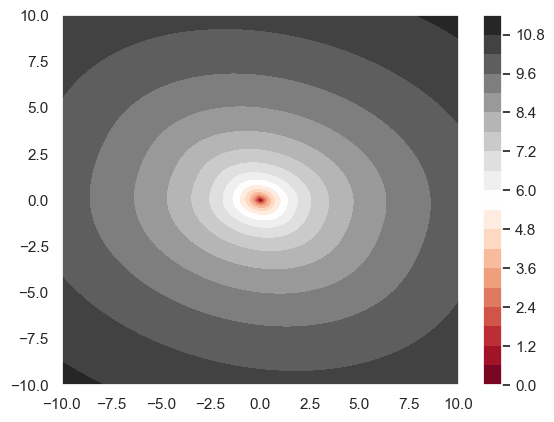

In [12]:
plt.contourf(X, Y, lagrangian_val_array, 20, cmap='RdGy')
plt.colorbar()
plt.savefig("beta1p75_close.png")
plt.show()

In [13]:
beta_val = 0.001 #beta-value approximately equa the critical value
lagrangian_val_array = np.zeros((len(xx_mesh), len(yy_mesh)))
for i in range(len(xx_mesh)):
  A[:,0] = xx_mesh[i]
  #A[:,1] = xx_mesh[i]
  for j in range(len(yy_mesh)):
    A[:, 1] = yy_mesh[j]
  # for j in range(len(yy_mesh)):
  #   A[:,1] = yy_mesh[j]
    l_t1 = (1-beta_val)*(np.log(np.linalg.det(np.matmul(np.matmul(A, sig_x), A.T))+cov_noise))
    l_t2 = np.log(np.linalg.det(cov_noise))
    l_t3 = beta_val*np.log(np.linalg.det(np.matmul(np.matmul(A, cov_x_y), A.T)+cov_noise))
    lagrangian_val =  l_t1 - l_t2 + l_t3
    lagrangian_val_array[i][j] = lagrangian_val.item()

print("Lagrangian shape:", lagrangian_val_array.shape)

Lagrangian shape: (500, 500)


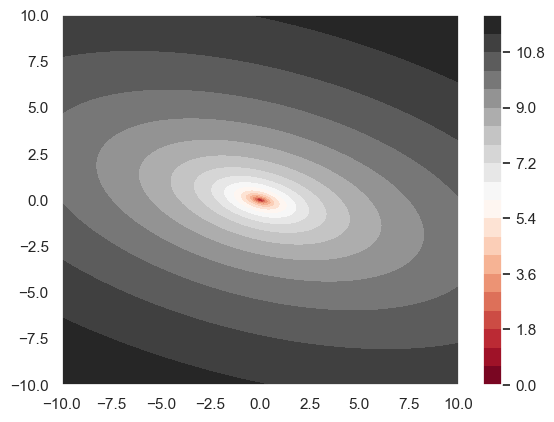

In [14]:
plt.contourf(X, Y, lagrangian_val_array, 20, cmap='RdGy')
plt.colorbar()
plt.savefig("beta0p01_close.png")
plt.show()

Plotting the information curve

In [15]:
#Defining the dimensions of the vectors
n_x = 15
n_y = 1
#Generating the marginal and parts of the covariance matrix
I_d = np.ones((n_x, n_x))
sig_xy = make_spd_matrix(n_x+n_y, random_state=1)
sig_11 = sig_xy[0:n_x, 0:n_x].reshape(n_x,n_x)
sig_12 = sig_xy[0:n_x, n_x:].reshape(n_x,n_y)
sig_21 = sig_xy[n_x:, 0:n_x].reshape(n_y,n_x)
sig_22 = sig_xy[n_x:, n_x:].reshape(n_y,n_y)
sig_x = sig_11
#Getting the conditional covariance matrix
cov_x_y = sig_11 - np.matmul(np.matmul(sig_12,(np.linalg.inv(sig_22))), sig_21)
eig_vals, eig_vecs = np.linalg.eigh(np.matmul(cov_x_y, np.linalg.inv(sig_x)))
eig_vals = np.array(sorted(eig_vals))
print("Eigen Values:", 1/(1-eig_vals))
print(I_d.shape)

Eigen Values: [ 1.82831059e+00  7.91920561e+00  1.53031886e+01  2.95917656e+01
  5.60314508e+01  3.47197190e+02  2.48645181e+03 -7.61310581e+02
 -3.12227035e+02 -9.81530105e+01 -9.53900252e+01 -5.96498486e+01
 -5.28236700e+01 -7.88579102e+00 -2.69330584e+00]
(15, 15)


In [16]:
def get_ni(eig_val_vec, beta_i):
  for i in range(len(eig_val_vec)):
    if(beta_i<(1/(1-eig_val_vec[i]))):
      return i
  return len(eig_val_vec)
get_ni(eig_vals, 10)

2

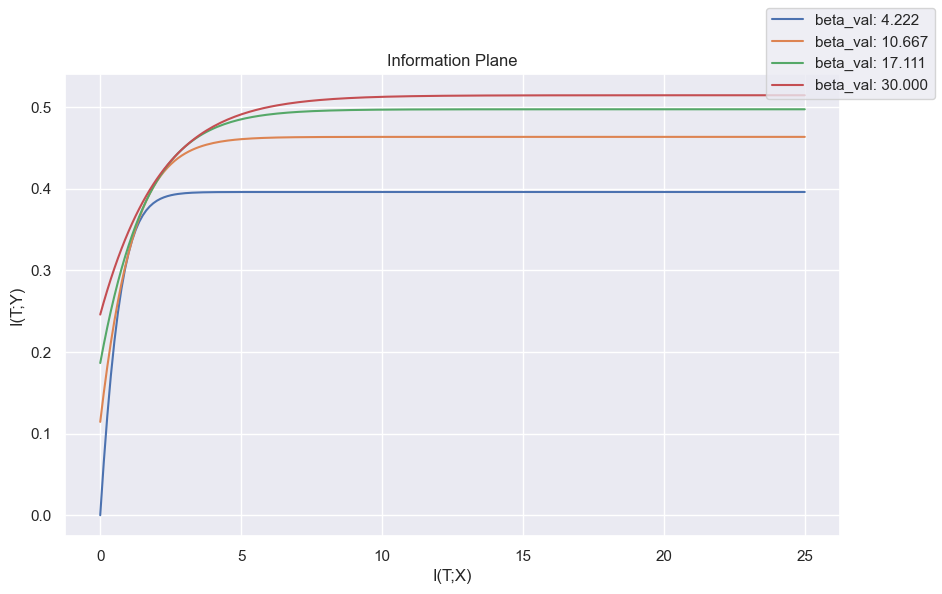

In [17]:

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Information Plane")
ax.set_xlabel("I(T;X)")
ax.set_ylabel("I(T;Y)")
beta_vals = np.linspace(1, 30, 10)
i_tx = np.linspace(0, 25, 200)
i_ty = 0
n_i_prev = 0
for beta_val in beta_vals:
  n_i = get_ni(eig_vals, beta_val)
  if(n_i==n_i_prev):
    continue
  n_i_prev = n_i
  t_1 = 1
  t_2 = 1
  for i in range(n_i):
    t_1 = t_1*((1-eig_vals[i])**(1/n_i))
    t_2 = t_2*(eig_vals[i]**(1/n_i))

  t_2 = np.exp(2*i_tx/n_i)*t_2
  i_ty = i_tx - (n_i/2)*np.log(t_1 + t_2)

  ax.plot(i_tx, i_ty, label=f"beta_val: {beta_val:.3f}")
fig.legend()